<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-данные" data-toc-modified-id="Откроем-и-изучим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем и изучим данные</a></span></li><li><span><a href="#Проверим-правильно-ли-рассчитана-эффективность-обогащения" data-toc-modified-id="Проверим-правильно-ли-рассчитана-эффективность-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим правильно ли рассчитана эффективность обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов на различных этапах</a></span><ul class="toc-item"><li><span><a href="#Концентрация-золота" data-toc-modified-id="Концентрация-золота-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Концентрация золота</a></span></li><li><span><a href="#Концентрация-серебра" data-toc-modified-id="Концентрация-серебра-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Концентрация серебра</a></span></li><li><span><a href="#Концентрация-свинца" data-toc-modified-id="Концентрация-свинца-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Концентрация свинца</a></span></li></ul></li><li><span><a href="#Сравним-распределение-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределение-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределение размеров гранул исходного сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию металлов на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели" data-toc-modified-id="Обучим-разные-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore') 

### Откроем и изучим данные

In [2]:
df_full = pd.read_csv('gold_industry_full.csv')
df_train = pd.read_csv('gold_industry_train.csv')
df_test = pd.read_csv('gold_industry_test.csv')

df_full.head()

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599                          11.986616   
1                57.278666                          11.971193   
2                57.510649                          11.920603   
3                57.792734                          11.630094   
4                56.047189                          10.957755   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  ...  \
0                            6.007990                       999.706909  ...   
1                            6.005766                      1000.286398  ...   
2                            6.197377                       999.719565  ...   
3                            6.203177                       999.814770  ...   
4                            6.198826                       999.678690  ...   

   secondary_cleaner.output.tail_sol  final.output.concentrate_au  \
0                           8.764648                    42.192020   
1                           9.001494                    42.701629   
2                           8.842896                    42.657501   
3                           9.122857                    42.689819   
4                           8.871028                    42.774141   

   final.output.concentrate_ag  final.output.concentrate_pb  \
0                     6.055403                     9.889648   
1                     6.029369                     9.968944   
2                     6.055926                    10.213995   
3                     6.047977                     9.977019   
4                     6.148599                    10.142511   

   final.output.concentrate_sol  final.output.recovery  final.output.tail_au  \
0                      5.507324              70.541216              2.143149   
1                      5.257781              69.266198              2.224930   
2                      5.383759              68.116445              2.257889   
3                      4.858634              68.347543              2.146849   
4                      4.939416              66.927016              2.055292   

   final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  
0             10.411962              0.895447              16.904297  
1             10.462676              0.927452              16.634514  
2             10.507046              0.953716              16.208849  
3             10.422762              0.883763              16.532835  
4             10.360302              0.792826              16.525686  

[5 rows x 87 columns]

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


В данных есть пропуски. Их будет необходимо обработать.

### Проверим правильно ли рассчитана эффективность обогащения

In [4]:
calculated_recovery = (df_train['rougher.output.concentrate_au']*\
                     (df_train['rougher.input.feed_au']-df_train['rougher.output.tail_au'])\
                    )/(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au'] - \
                                                           df_train['rougher.output.tail_au']))*100

In [5]:
calculated_recovery = pd.Series(calculated_recovery, index=df_train.index)
mae = mean_absolute_error(df_train['rougher.output.recovery'], calculated_recovery)
mae

9.83758577644259e-15

МАЕ близка к 0, следовательно эффективность обогащения рассчитана правильно.

### Проанализируем признаки, недоступные в тестовой выборке

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

В тестовой выборке отсутствуют 34 столбца. Это расчетные характеристики, данные по концентрациям на выходе, хвосты. Эти параметры не являются признаками, они доступны только после окончания процесса.

### Проведем предобработку данных

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


**Проверим дадасет на наличие простых дубликатов**

In [8]:
df_train.duplicated().sum()

0

**Добавим в df_test целевые признаки**

In [9]:
df_full = df_full.set_index('date')
df_test = df_test.set_index('date')
df_train = df_train.set_index('date')

In [10]:
target_test = pd.DataFrame(data = df_full, columns= ['rougher.output.recovery', 'final.output.recovery'], index=df_test.index)
target_test

rougher.output.recovery  final.output.recovery
date                                                               
2017-12-09 14:59:59                89.514960              70.281454
2017-12-09 15:59:59                89.858126              65.523246
2017-12-09 16:59:59                91.816623              74.817644
2017-12-09 17:59:59                88.478959              63.082720
2017-12-09 18:59:59                89.230316              74.463380
...                                      ...                    ...
2018-08-18 06:59:59                85.462226              68.786981
2018-08-18 07:59:59                85.443505              67.839536
2018-08-18 08:59:59                87.235441              70.847012
2018-08-18 09:59:59                89.299981              72.659046
2018-08-18 10:59:59                87.650868              70.279619

[4860 rows x 2 columns]

In [11]:
df_test = df_test.join(target_test)
df_test

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2017-12-09 14:59:59               4.365491               6.158718   
2017-12-09 15:59:59               4.362781               6.048130   
2017-12-09 16:59:59               5.081681               6.082745   
2017-12-09 17:59:59               5.145949               6.084374   
2017-12-09 18:59:59               5.735249               6.165220   
...                                    ...                    ...   
2018-08-18 06:59:59               6.620245               5.992592   
2018-08-18 07:59:59               6.741324               6.158617   
2018-08-18 08:59:59               6.627458               6.015149   
2018-08-18 09:59:59               6.702243               6.097592   
2018-08-18 10:59:59               6.633002               5.908793   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2017-12-09 14:59:59               3.875727               39.135119   
2017-12-09 15:59:59               3.902537               39.713906   
2017-12-09 16:59:59               4.564078               37.208683   
2017-12-09 17:59:59               4.768124               36.808874   
2017-12-09 18:59:59               4.512346               37.810642   
...                                    ...                     ...   
2018-08-18 06:59:59               2.589242               39.934641   
2018-08-18 07:59:59               2.647185               40.176307   
2018-08-18 08:59:59               2.466127               39.841423   
2018-08-18 09:59:59               2.278955               37.728375   
2018-08-18 10:59:59               2.440899               36.958540   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2017-12-09 14:59:59               555.820208                94.544358   
2017-12-09 15:59:59               544.731687               123.742430   
2017-12-09 16:59:59               558.155110                82.610855   
2017-12-09 17:59:59               539.713765                77.984784   
2017-12-09 18:59:59               558.713584                86.434874   
...                                      ...                      ...   
2018-08-18 06:59:59               578.654582                63.473450   
2018-08-18 07:59:59               571.622005                62.815291   
2018-08-18 08:59:59               563.733146                61.287347   
2018-08-18 09:59:59               549.812490                59.637037   
2018-08-18 10:59:59               573.076049                58.509262   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2017-12-09 14:59:59                           6.146982   
2017-12-09 15:59:59                           6.210119   
2017-12-09 16:59:59                           7.363824   
2017-12-09 17:59:59                           6.927072   
2017-12-09 18:59:59                           7.823471   
...                                                ...   
2018-08-18 06:59:59                          14.688804   
2018-08-18 07:59:59                          14.892720   
2018-08-18 08:59:59                          13.723692   
2018-08-18 09:59:59                          13.746510   
2018-08-18 10:59:59                          13.707775   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2017-12-09 14:59:59                            9.308612   
2017-12-09 15:59:59                            9.297709   
2017-12-09 16:59:59                            9.003562   
2017-12-09 17:59:59                            8.955597   
2017-12-09 18:59:59                            7.490356   
...                                                 ...   
2018-08-18 06:59:59                

**Заполним пропуски в df_train**

Так как, в описании проекта сказано, что соседние по времени параметры часто похожи, заменим пропуски предыдущими непропущенными значениями.

In [12]:
df_train=df_train.fillna(method='ffill')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14579 non-null  float64
 3   rougher.input.feed_sol                              14579 non-null  float64
 4   rougher.input.feed_rate                             14579 non-null  float64
 5   rougher.input.feed_size                             14579 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14579 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14579 non-null  float64
 8   rougher.state.floatbank10_a_air                  

## Анализ данных

### Посмотрим, как меняется концентрация металлов на различных этапах

#### Концентрация золота

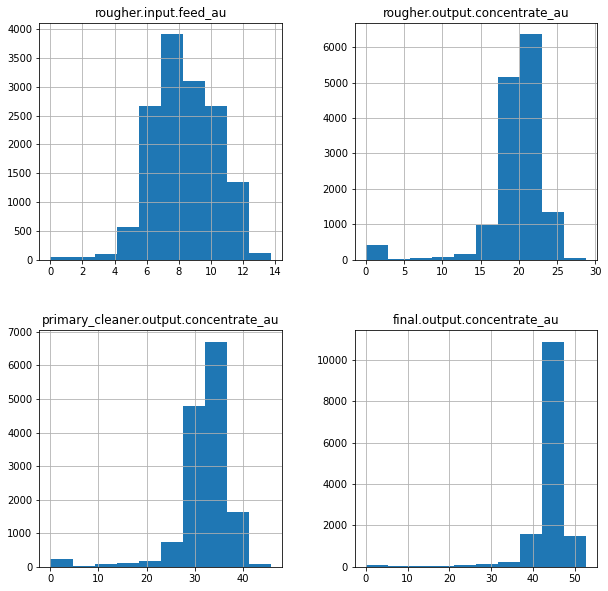

In [13]:
df_train[['rougher.input.feed_au','rougher.output.concentrate_au',\
          'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].hist(figsize=(10,10));

#### Концентрация серебра

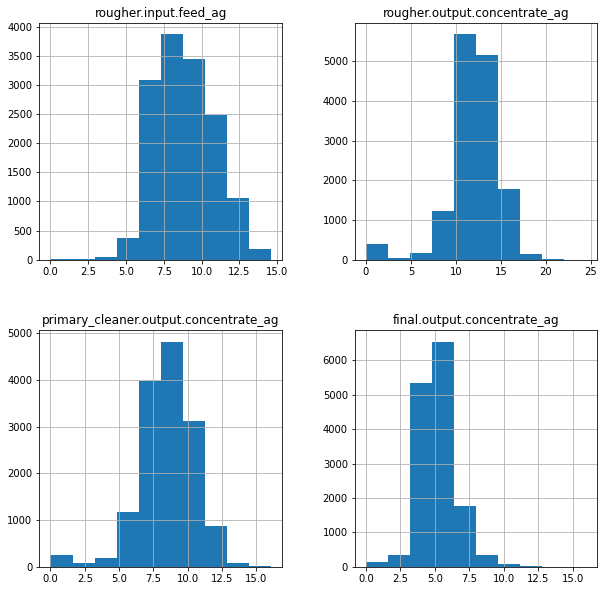

In [14]:
df_train[['rougher.input.feed_ag','rougher.output.concentrate_ag',\
          'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].hist(figsize=(10,10));

#### Концентрация свинца

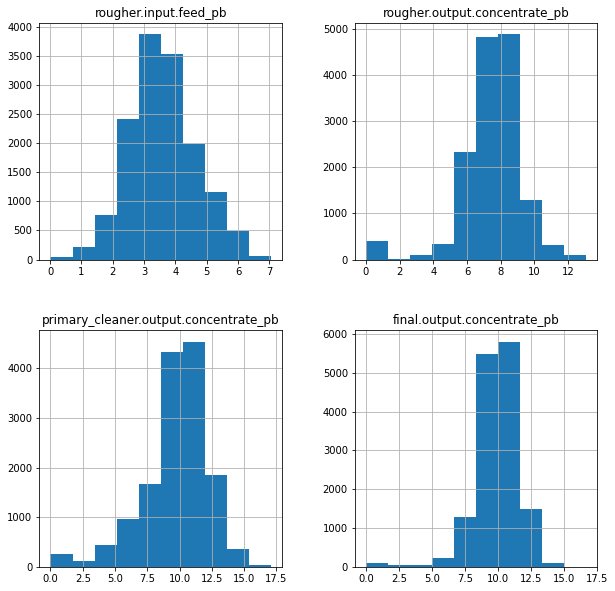

In [15]:
df_train[['rougher.input.feed_pb','rougher.output.concentrate_pb',\
          'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].hist(figsize=(10,10));

In [16]:
print('Концентрация металлов в сырье:')
print('Золота: {: .2f}, Серебра: {: .2f}, Свинца: {: .2f}'. \
      format(df_train['rougher.input.feed_au'].mean(), df_train['rougher.input.feed_ag'].mean(), \
             df_train['rougher.input.feed_pb'].mean()))
print('')
print('Концентрация металлов в черновом концентрате:')
print('Золота: {: .2f}, Серебра: {: .2f}, Свинца: {: .2f}'. \
      format(df_train['rougher.output.concentrate_au'].mean(), df_train['rougher.output.concentrate_ag'].mean(), \
             df_train['rougher.output.concentrate_pb'].mean())) 
print('')
print('Концентрация металлов после первой очистки:')
print('Золота: {: .2f}, Серебра: {: .2f}, Свинца: {: .2f}'. \
      format(df_train['primary_cleaner.output.concentrate_au'].mean(), df_train['primary_cleaner.output.concentrate_ag'].mean(), \
             df_train['primary_cleaner.output.concentrate_pb'].mean())) 
print('')
print('Концентрация металлов после второй очистки:')
print('Золота: {: .2f}, Серебра: {: .2f}, Свинца: {: .2f}'. \
      format(df_train['final.output.concentrate_au'].mean(), df_train['final.output.concentrate_ag'].mean(), \
             df_train['final.output.concentrate_pb'].mean())) 

Концентрация металлов в сырье:
Золота:  8.35, Серебра:  8.88, Свинца:  3.59

Концентрация металлов в черновом концентрате:
Золота:  19.72, Серебра:  11.94, Свинца:  7.50

Концентрация металлов после первой очистки:
Золота:  32.01, Серебра:  8.47, Свинца:  9.73

Концентрация металлов после второй очистки:
Золота:  43.98, Серебра:  5.19, Свинца:  9.92


Концентрация золота на каждом этапе возрастает, так же, как и свинца. Концентрация серебра сильно падает после второго этапа очистки. 

### Сравним распределение размеров гранул исходного сырья на обучающей и тестовой выборках

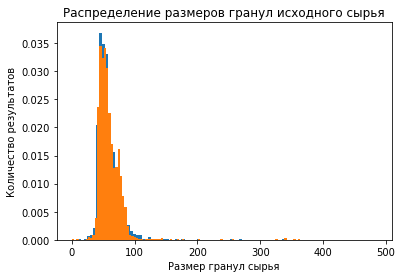

In [17]:
plt.hist(df_train['rougher.input.feed_size'], bins=100, density=True)
plt.hist(df_test['rougher.input.feed_size'], bins=100, density=True)
plt.title('Распределение размеров гранул исходного сырья')
plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")
plt.show()

Распределение гранул исходного сырья на обучающей и тестовой выборках сильно не отличаются.

### Исследуем суммарную концентрацию металлов на разных стадиях

In [18]:
df_train['rougher.input.feed_m'] = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag']\
+ df_train['rougher.input.feed_pb']

In [19]:
df_train['rougher.output.concentrate_m'] = df_train['rougher.output.concentrate_au'] + \
df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb']

In [20]:
df_train['primary_cleaner.output.concentrate_m'] = df_train['primary_cleaner.output.concentrate_au'] + \
df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb']

In [21]:
df_train['final.output.concentrate_m'] = df_train['final.output.concentrate_au'] + \
df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb']

Концентрация металлов в сырье:  20.82

Концентрация металлов в черновом концентрате:  39.16

Концентрация металлов после первой очистки:  50.21

Концентрация металлов после второй очистки:  59.10


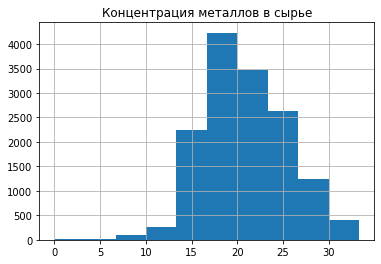

In [22]:
print('Концентрация металлов в сырье: {: .2f}'. \
      format(df_train['rougher.input.feed_m'].mean()))
print('')
print('Концентрация металлов в черновом концентрате: {: .2f}'. \
      format(df_train['rougher.output.concentrate_m'].mean())) 
print('')
print('Концентрация металлов после первой очистки: {: .2f}'. \
      format(df_train['primary_cleaner.output.concentrate_m'].mean())) 
print('')
print('Концентрация металлов после второй очистки: {: .2f}'. \
      format(df_train['final.output.concentrate_m'].mean())) 
df_train['rougher.input.feed_m'].hist().set_title('Концентрация металлов в сырье');

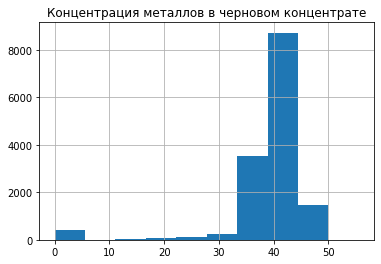

In [23]:
df_train['rougher.output.concentrate_m'].hist().set_title('Концентрация металлов в черновом концентрате');

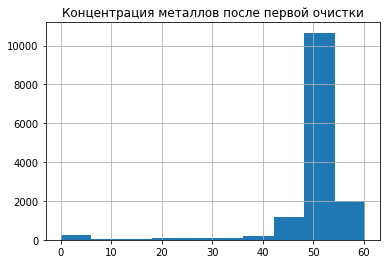

In [24]:
df_train['primary_cleaner.output.concentrate_m'].hist().set_title('Концентрация металлов после первой очистки');

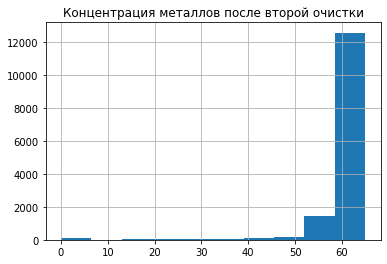

In [25]:
df_train['final.output.concentrate_m'].hist().set_title('Концентрация металлов после второй очистки');

Обратим внимание на нулевые и около нулевые значения концентраций. Это явная ошибка. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить.

In [26]:
df_train = df_train[df_train['rougher.output.concentrate_m'] >= 10]

In [27]:
df_train = df_train[df_train['primary_cleaner.output.concentrate_m'] >= 10]

In [28]:
df_train = df_train[df_train['rougher.input.feed_m'] >= 10]

In [29]:
df_train = df_train[df_train['final.output.concentrate_m'] >= 10]

**Построим графики по обновленным данным** 

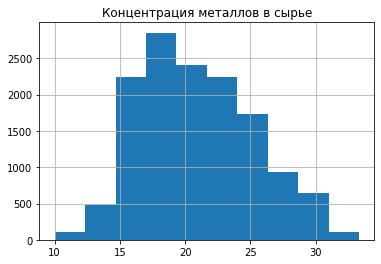

In [30]:
df_train['rougher.input.feed_m'].hist().set_title('Концентрация металлов в сырье');

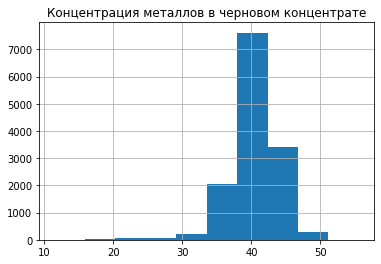

In [31]:
df_train['rougher.output.concentrate_m'].hist().set_title('Концентрация металлов в черновом концентрате');

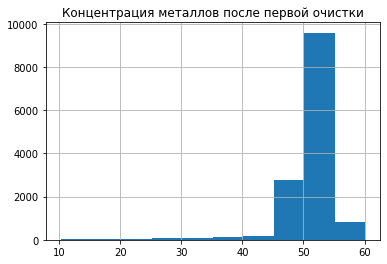

In [32]:
df_train['primary_cleaner.output.concentrate_m'].hist().set_title('Концентрация металлов после первой очистки');

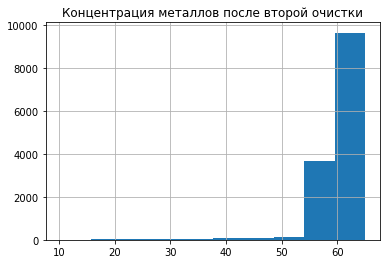

In [33]:
df_train['final.output.concentrate_m'].hist().set_title('Концентрация металлов после второй очистки');

Суммарная концентрация металлов возрастает на каждой стадии. 

**Оставим в df_train только те столбцы, в которых есть признаки и целевые признаки**

In [34]:
df_train = df_train.loc[:, df_test.columns]
df_train

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   
...                                    ...                    ...   
2017-12-09 09:59:59               4.599524               5.822083   
2017-12-09 10:59:59               4.658125               5.844800   
2017-12-09 11:59:59               5.335862               6.091855   
2017-12-09 12:59:59               4.838619               6.121323   
2017-12-09 13:59:59               4.525061               5.970515   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   
...                                    ...                     ...   
2017-12-09 09:59:59               4.255546               37.480479   
2017-12-09 10:59:59               4.241564               37.395565   
2017-12-09 11:59:59               4.617558               37.369774   
2017-12-09 12:59:59               4.144989               38.591551   
2017-12-09 13:59:59               4.020002               40.074026   

                     rougher.input.feed_rate  rougher.input.feed_size  \
date                                                                    
2016-01-15 00:00:00               523.546326                55.486599   
2016-01-15 01:00:00               525.290581                57.278666   
2016-01-15 02:00:00               530.026610                57.510649   
2016-01-15 03:00:00               542.590390                57.792734   
2016-01-15 04:00:00               540.531893                56.047189   
...                                      ...                      ...   
2017-12-09 09:59:59               559.895089                85.247019   
2017-12-09 10:59:59               561.464855                83.860651   
2017-12-09 11:59:59               560.889077                85.718304   
2017-12-09 12:59:59               559.031805               119.499241   
2017-12-09 13:59:59               555.682872               122.262690   

                     rougher.input.floatbank10_sulfate  \
date                                                     
2016-01-15 00:00:00                          11.986616   
2016-01-15 01:00:00                          11.971193   
2016-01-15 02:00:00                          11.920603   
2016-01-15 03:00:00                          11.630094   
2016-01-15 04:00:00                          10.957755   
...                                                ...   
2017-12-09 09:59:59                           6.775864   
2017-12-09 10:59:59                           6.770561   
2017-12-09 11:59:59                           7.762770   
2017-12-09 12:59:59                           7.356687   
2017-12-09 13:59:59                           6.586020   

                     rougher.input.floatbank10_xanthate  \
date                                                      
2016-01-15 00:00:00                            6.007990   
2016-01-15 01:00:00                            6.005766   
2016-01-15 02:00:00                            6.197377   
2016-01-15 03:00:00                            6.203177   
2016-01-15 04:00:00                            6.198826   
...                                                 ...   
2017-12-09 09:59:59                

## Модель

### Напишем функцию для вычисления итоговой sMAPE

In [35]:
def smape(target, predict):
    smape = ((np.abs(target-predict))/(np.abs(target)+np.abs(predict)/2))*100
    smape = np.mean(smape)
    return smape

In [36]:
def smape_result(rougher, final):
    return (0.25*rougher + 0.75*final)   

### Обучим разные модели

**Разобьем обучающую выборку на признаки и целевые признаки**

In [37]:
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']
features_train_rougher = df_train.iloc[:, 0:22]
features_train_final = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [38]:
target_train_rougher.shape

(13767,)

In [39]:
target_train_final.shape

(13767,)

In [40]:
features_train_rougher.shape

(13767, 22)

In [41]:
features_train_final.shape

(13767, 52)

**Разобьем тестовую выборку на признаки и целевые признаки**

Перед тем, как разбивать тестовую выборку, надо заменить пропуски перыдущими непропущенными значениями.

In [42]:
df_test = df_test.fillna(method='ffill')

In [43]:
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']
features_test_rougher = df_test.iloc[:, 0:22]
features_test_final = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [44]:
target_test_rougher.shape

(4860,)

In [45]:
target_test_final.shape

(4860,)

In [46]:
features_test_rougher.shape

(4860, 22)

In [47]:
features_test_final.shape

(4860, 52)

In [48]:
smape_scorer = make_scorer(smape)

**Linear Regression**

In [49]:
LN_scores_rougher = cross_val_score(LinearRegression(),\
                                    features_train_rougher, target_train_rougher, cv=5, scoring=smape_scorer)
smape_LN_rougher = np.mean(np.abs(LN_scores_rougher))
print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'.format(smape_LN_rougher))

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 4.32


In [50]:
LN_scores_final = cross_val_score(LinearRegression(),\
                                    features_train_final, target_train_final, cv=5, scoring=smape_scorer)
smape_LN_final = np.mean(np.abs(LN_scores_final))
print('Симметричное среднее абсолютное процентное отклонение для финального концентрата: {:.2f}'.format(smape_LN_final))

Симметричное среднее абсолютное процентное отклонение для финального концентрата: 6.37


In [51]:
print('Итоговое отклонение линейной регрессии: {:.2f}'.format(smape_result(smape_LN_rougher, smape_LN_final)))

Итоговое отклонение линейной регрессии: 5.86


**Decision Tree Regressor**

In [52]:
best_model_DT=None
smape_DT_rougher=10000
best_depth_DT=0

for depth in range(1,15):
    model_DT = DecisionTreeRegressor(random_state=0, max_depth=depth)
    DT_scores_rougher = cross_val_score(model_DT, features_train_rougher, target_train_rougher, cv=5, scoring=smape_scorer)
    result = np.mean(np.abs(DT_scores_rougher))
    if result < smape_DT_rougher:
        best_model_DT = model_DT
        smape_DT_rougher = result
        best_depth_DT = depth

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'\
      .format(smape_DT_rougher), ', максимальная глубина::', best_depth_DT)

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 4.02 , максимальная глубина:: 2


In [53]:
best_model_DT_final=None
smape_DT_final=10000
best_depth_DT_final=0

for depth in range(1,15):
    model_DT_final = DecisionTreeRegressor(random_state=0, max_depth=depth)
    DT_scores_final = cross_val_score(model_DT_final, features_train_final, target_train_final, cv=5, scoring=smape_scorer)
    result = np.mean(np.abs(DT_scores_final))
    if result < smape_DT_final:
        best_model_DT_final = model_DT_final
        smape_DT_final = result
        best_depth_DT_final = depth

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'\
      .format(smape_DT_final), ', максимальная глубина::', best_depth_DT_final)

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 5.88 , максимальная глубина:: 2


In [54]:
print('Итоговое отклонение дерева решений в регрессии: {:.2f}'.format(smape_result(smape_DT_rougher, smape_DT_final)))

Итоговое отклонение дерева решений в регрессии: 5.41


**Random Forest Regressor**

In [55]:
best_model_RF=None
smape_RF_rougher=10000
best_depth_RF_rougher=0
best_est_RF_rougher=0

for est in range(1, 42, 10):
    for depth in range(1,10):
        model_RF = RandomForestRegressor(random_state=0, max_depth=depth, n_estimators=est)
        RF_scores_rougher = cross_val_score(model_RF, features_train_rougher, target_train_rougher, cv=5, scoring=smape_scorer)
        result = np.mean(np.abs(RF_scores_rougher))
        if result < smape_RF_rougher:
            best_model_RF = model_RF
            smape_RF_rougher = result
            best_depth_RF_rougher = depth
            best_est_RF_rougher = est

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'\
      .format(smape_RF_rougher), ', колличество деревьев:', best_est_RF_rougher, ', максимальная глубина:', best_depth_RF_rougher)

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 3.89 , колличество деревьев: 41 , максимальная глубина: 3


In [56]:
best_model_RF_final=None
smape_RF_final=10000
best_depth_RF_final=0
best_est_RF_final=0

for est in range(1, 42, 10):
    for depth in range(1,10):
        model_RF_final = RandomForestRegressor(random_state=0, max_depth=depth, n_estimators=est)
        RF_scores_final = cross_val_score(model_RF_final, features_train_final, target_train_final, cv=5, scoring=smape_scorer)
        result = np.mean(np.abs(RF_scores_final))
        if result < smape_RF_final:
            best_model_RF_final = model_RF_final
            smape_RF_final = result
            best_depth_RF_final = depth
            best_est_RF_final = est

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'\
      .format(smape_RF_final), ', колличество деревьев:', best_est_RF_final, ', максимальная глубина:', best_depth_RF_final)

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 5.81 , колличество деревьев: 21 , максимальная глубина: 2


In [57]:
print('Итоговое отклонение случайного леса в регрессии: {:.2f}'.format(smape_result(smape_RF_rougher, smape_RF_final)))

Итоговое отклонение случайного леса в регрессии: 5.33


Наименьшее итоговое среднее абсолютное процентное отклонение показала модель Random Forest Regressor, его и будем использовать на тестовой выборке

**Проверим лучшую модель на тестовой выборке**

In [58]:
model_rougher = RandomForestRegressor(random_state=0, max_depth=3, n_estimators=41)
model_rougher.fit(features_train_rougher, target_train_rougher)
predictions_rougher_test = model_rougher.predict(features_test_rougher)
smape_rougher_test = smape(target_test_rougher, predictions_rougher_test)

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'.format(smape_rougher_test))

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 2.89


In [59]:
model_final = RandomForestRegressor(random_state=0, max_depth=2, n_estimators=21)
model_final.fit(features_train_final, target_train_final)
predictions_final_test = model_final.predict(features_test_final)
smape_final_test = smape(target_test_final, predictions_final_test)

print('Симметричное среднее абсолютное процентное отклонение для чернового концентрата: {:.2f}'.format(smape_final_test))

Симметричное среднее абсолютное процентное отклонение для чернового концентрата: 5.75


In [60]:
print('Итоговое среднее абсолютное процентное отклонение: {:.2f}'.format(smape_result(smape_rougher_test, smape_final_test)))

Итоговое среднее абсолютное процентное отклонение: 5.03


Итоговое отклонение около 5%, модель отлично подходит для использования.

**Проверим можель на адекватность**

In [61]:
dummy_regressor_rougher = DummyRegressor(strategy="mean")
dummy_regressor_rougher.fit(features_train_rougher, target_train_rougher)
pred_test_rougher = dummy_regressor_rougher.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher, pred_test_rougher)
smape_rougher

4.078863300330701

In [62]:
dummy_regressor_final = DummyRegressor(strategy="mean")
dummy_regressor_final.fit(features_train_final, target_train_final)
pred_test_final = dummy_regressor_final.predict(features_test_final)
smape_final = smape(target_test_final, pred_test_final)
smape_final

6.270516026331491

In [63]:
print('Итоговое среднее абсолютное процентное отклонение константной модели: {:.2f}'\
      .format(smape_result(smape_rougher, smape_final)))

Итоговое среднее абсолютное процентное отклонение константной модели: 5.72


## Вывод

После загрузки и изучения данных, были выявлены пропуски. С помощью метрики МАЕ убедились, что эффективность обогащения рассчитана правильно. Изучили, данную нам, тестовую выборку. Там отсутствуют 34 столбца. Это расчетные характеристики, данные по концентрациям на выходе, хвосты. Эти параметры не являются признаками, они доступны только после окончания процесса.

Провели предобработку данных:
- Простые дубликаты не были выявлены. 
- В тестовую выборку добавили целевые признаки. 
- В тренировочной выборке заменили пропуски предыдущими непропущенными значениями.

Посмотрели, как меняется концентрация металлов на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Концентрация золота и свинца на каждом этапе возрастает. Концентрация серебра сильно падает после второго этапа очистки.

Сравнили распределение размеров гранул исходного сырья на обучающей и тестовой выборках. Они сильно не отличаются.

Исследовали суммарную концентрацию металлов на разных стадиях. Обратили внимание на нулевые и около нулевые значения концентраций. Это явная ошибка. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения удалили из обучающих данных. Построили графики по обновленным данным. Суммарная концентрация металлов возрастает на каждой стадии. 

В тренировочной выборке оставили только те столбцы, в которых есть признаки и целевые признаки.

Написали функцию для вычисления итоговой sMAPE. Разбили обучающую выборку на признаки и целевые признаки. Перед тем, как разбить тестовую выборку, заменили пропущенные значения предыдущими непропущенными. На обучающей выборке проверили 3 модели: Линейная регрессия, Дерево решений в регрессии и Случайный лес в регрессии. Лучшей себя показала модель Случайный лес. Ее проверили на тестовой выборке. Итоговое среднее абсолютное процентное отклонение около 5%. Проверили модель на адекватность. Среднее отклонение константной модели оказалась выше, значит выбранная нами модель отлично подходит для использования.